# Разведочное исследование и поиск аномалий

У нас есть датасет с сотрудниками и некоторой информацией по ним. 

Задача: базово понять фактуру по этому датасету в течение короткого периода времени (20-30 минут), прикинуть какие-то направления для дальнейшего исследования.  

Исходный csv-файл взят отсюда:

https://www.kaggle.com/rhuebner/human-resources-data-set?select=HRDataset_v14.csv

In [239]:
# Импортируем первую библиотеку для работы с данными Pandas
import pandas as pd

In [240]:
# Загрузим CSV-файл с данными (CSV-файл должен лежать рядом с исполняемым блокнотом)
df_hr = pd.read_csv('HW2 with changes.csv')

In [241]:
# Частично отрисуем этот датасет на экран
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,3,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,3,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,3,884,Research & Development,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,Research & Development,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,Research & Development,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,3,1023,Sales,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,0,14,3,4,80,0,17,3,2,9,6,0,8


In [242]:
pd.options.display.max_columns = 999

# Теперь количество столбцов, которое мы увидим при отображении дисплея будет гораздо больше (до 999)

In [243]:
df_hr.head()
# Убедимся, что столбцов теперь отбражается больше

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,3,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,3,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [244]:
# Проверим датасет на наличие пустых значений при помощи метода .info()

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                


Мы проверили датасет на наличие пустых значений и можем наблюдать их отсутствие. 

!!!!Значения некоторых показателей в базе данных были отредактированны в числовой формат (int64): (Yes no на 1 и 0; Male Female на 1 и 0; Non-Travel Travel_Rarely Travel_Frequently на 1 2 3)!!!

Обратите внимание на mean по полю Attrititon 
В распределениях Бернулли из нулей и единиц среднее окажется 
синонимично доле единиц в выборке. 


In [245]:
df_hr.describe()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.086395,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,1.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,3.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [246]:
# Pandas имеет еще один волшебный метод, который сразу считает матрицу корреляций по всему фрейму
df_hr.corr()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.011807,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.127006,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,-0.011807,0.127006,1.000000,-0.015539,-0.009696,-0.008670,NaN,-0.018538,-0.011310,-0.044896,-0.004164,0.029300,-0.011696,0.008666,-0.013450,-0.008440,-0.030743,0.042752,-0.025727,0.001683,0.008926,NaN,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229
DailyRate,0.010661,-0.056652,-0.015539,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.009696,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.008670,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.018538,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.024037,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,-0.011310,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.044896,-0.011716,-0.001851,-0.016547,NaN,0.022556,0.000508,1.000000,-0.000478,0.017960,-0.039403,0.033252,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,NaN,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


Значимые значения корреляции (>0.77) наблюдаются между следующими показателями: Joblevel и TotalWorkingYears (0,78); TotalWorkingYears и MonthlyIncome 0,77. Можно предположить, что в организации используются мезанизмы награждения персонала в соответствии с их опыту работы и привережнности организации: они получают повышения по уровню заработной платы и по занимаемым должностям. 

In [247]:
# Проверим, сколько у нас уникальных значений в столбце
df_hr['BusinessTravel'].nunique()

3

In [248]:
# Сооответственно, комания подразделяет людей на три категории по частоте их бизнес коммандировок: перевод этих значений в числовые был осущствлен успешно 

In [249]:
# Как мы видим, им были даны числовые значения от 1 до 3
df_hr['BusinessTravel'].unique()

array([2, 3, 1], dtype=int64)

## Вопрос вопросов: 

А почему мы храним именно 0 и 1? 

In [250]:
"""

В любой ситуации (не только в Python) можно быстро прикинуть соотношение классов,
если у нас всего два класса, один из которых 0, а второй 1. 

Тогда Count() будет возвращать общий счетчик объектов, а Sum() сумму всех единиц, 
то есть их же количество. 

Разница между работой Sum() и Count() важный момент, запомните это. 

"""

'\n\nВ любой ситуации (не только в Python) можно быстро прикинуть соотношение классов,\nесли у нас всего два класса, один из которых 0, а второй 1. \n\nТогда Count() будет возвращать общий счетчик объектов, а Sum() сумму всех единиц, \nто есть их же количество. \n\nРазница между работой Sum() и Count() важный момент, запомните это. \n\n'

In [251]:
df_hr['Gender'].count()

1470

In [252]:
df_hr['Gender'].sum()

882

# Значит у нас есть 882 объекта со значением Gender "1" (мужчин) и 1470-882 объектов с Gender знеачением "0" - женщин 

In [253]:
df_hr['MonthlyIncome'].sum()

9559309

In [254]:
# Данное значение демонстрирует, сколько денежных средств компания фактически тратит на своих сотрудников в месяц

In [255]:
# Чаще используется метод .head(), который возвращает только первые несколько строк (количество строк передается в скобках)
df_hr.head(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,3,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,3,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,3,1005,Research & Development,2,2,Life Sciences,1,8,4,1,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,0,13,3,3,80,0,8,2,2,7,7,3,6


In [256]:
# Определим типы данных в столбцах

df_hr.dtypes

Age                          int64
Attrition                    int64
BusinessTravel               int64
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                       int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Тут мы имеем: 
* int64
* float64
* object
Как было указано ранее, типы данных object по некоторым переменным были конвертированы в int64

Далее займемся занимательным рисованием

In [257]:
# Импортируем библиотеки для рисования

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='MonthlyIncome'>

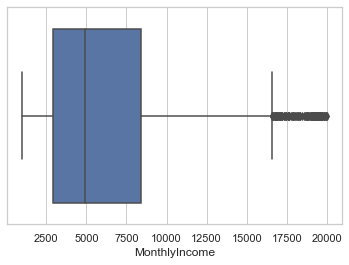

In [258]:
# Нарисуем боксплот для зарплат
sns.boxplot(x=df_hr["MonthlyIncome"])

In [259]:
# Видим, что распределение явно смещенное, все выбросы справа

Text(0, 0.5, 'Amount of employees')

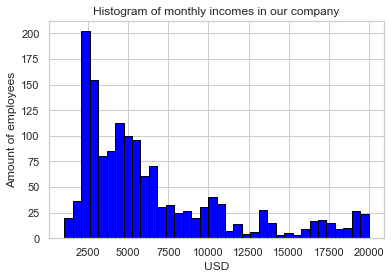

In [260]:
# matplotlib histogram
plt.hist(df_hr['MonthlyIncome'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of monthly incomes in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [261]:
# Видим, что распределение похоже на Лог-нормальное с резким ростом при наибольших значениях заработной платы. Это может говорить о том, что сотрудники компании могут четко наблюдать разницу между 
# рядовыми сотрдуниками организации, получающих средний уроень заработной платы, и небольшой группой сотрудников на ключевых должностях, которые получают существенно меньше. 

# Импортируем еще одну чудную библиотеку -- Numpy!
# Она предназначена для базовых операций над числами при работе с выборками и лежит в основе Pandas

In [262]:
import numpy as np

In [263]:
# Среднее значение по зарплате
np.mean(df_hr.MonthlyIncome)

6502.931292517007

In [264]:
# А медиана? 
np.median(df_hr.MonthlyIncome)

4919.0

In [265]:
# Обращает внимание что медиана ниже среднего значения где-то на 1500. Вероятнее всего это вызвано тем, что сотрудники на ключевых должностях получают существенно больше денег, чем рядовые 
# сотрудники, высокие значения 

### Никогда не забываем, что средних у нас как минимум 4 вида: 

#### Мода (ну типо даже не совсем среднее, но из той же оперы, поэтому тут)
Самое частовстречающееся значение в выборке. В выборке может быть больше 1, а может быть даже 0 мод. 

#### Арифметическое среднее (Average, also called the arithmetic mean)
is the sum of all the values divided by the number of values. 

#### Среднее значение (mean)

is the average in the given data. 
In statistics, the mean is equal to the total number of observations divided by the number of observations.


#### Среднее арифметическое взвешенное: 

Среднее арифметическое взвешенного набора чисел с учетом их "веса" (количества повторений).
Пример - центр массы самолета или температура итоговой смеси нескольких жидкостей с разными температурами. 

#### Медиана
Делит выборку на 2 равные части. Половина выборки находится до, а половина после медианы. Внутри самой выборки медианы может даже не существовать


In [266]:
# Variance (дисперсия) зарплат
np.var(df_hr.MonthlyIncome)

22149778.937456165

In [267]:
# Среднеквадратическое отклонение (также это корень из дисперсии)
np.std(df_hr.MonthlyIncome)

4706.355164823004

In [268]:
3*np.std(df_hr.MonthlyIncome)

14119.065494469012

# Сделаем подвыборку из выборки

In [269]:
# Выделим в отдельные массивы сотрудников с разными GenderID
df_hr_g1 = df_hr[df_hr['Gender'] == 1]
df_hr_g0 = df_hr[df_hr['Gender'] == 0]

# И сразу проверим что сработало корректно
df_hr_g1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,3,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
4,27,0,2,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,3,1005,Research & Development,2,2,Life Sciences,1,8,4,1,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,0,13,3,3,80,0,8,2,2,7,7,3,6
7,30,0,2,1358,Research & Development,24,1,Life Sciences,1,11,4,1,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,0,22,4,2,80,1,1,2,3,1,0,0,0


In [270]:
df_hr_g0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
3,33,0,3,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
6,59,0,2,1324,Research & Development,3,3,Medical,1,10,3,0,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,1,20,4,1,80,3,12,3,2,1,0,0,0
11,29,0,2,153,Research & Development,15,2,Life Sciences,1,15,4,0,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Y,1,12,3,4,80,0,10,3,3,9,5,0,8
15,29,0,2,1389,Research & Development,21,4,Life Sciences,1,20,2,0,51,4,3,Manufacturing Director,1,Divorced,9980,10195,1,Y,0,11,3,3,80,1,10,1,3,10,9,8,8


In [271]:
print("Count of Gender = 1\
 is {} and for Gender = 0 is {}".format(len(df_hr_g1),
                                           len(df_hr_g0)))

Count of Gender = 1 is 882 and for Gender = 0 is 588


In [272]:
print("Median of salary for Gender = 1 \
is {} and for Gender = 0 is {}".format(np.median(df_hr_g1.MonthlyIncome),
                                           np.median(df_hr_g0.MonthlyIncome)))

Median of salary for Gender = 1 is 4837.5 and for Gender = 0 is 5081.5


<AxesSubplot:xlabel='MonthlyIncome'>

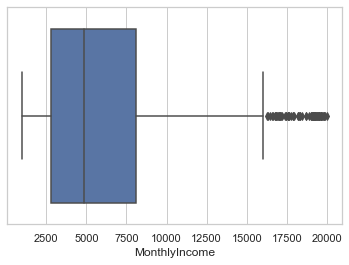

In [273]:
sns.boxplot(x=df_hr_g1["MonthlyIncome"])

<AxesSubplot:xlabel='MonthlyIncome'>

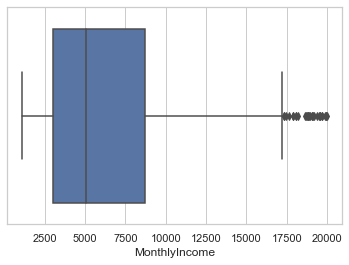

In [274]:
sns.boxplot(x=df_hr_g0["MonthlyIncome"])

Text(0, 0.5, 'Amount of employees')

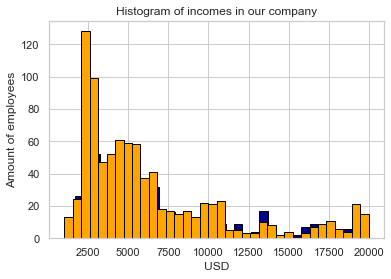

In [275]:
plt.hist(df_hr_g0['MonthlyIncome'], color = 'darkblue', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g1['MonthlyIncome'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of incomes in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [276]:
# Среднее значение указало на то, что женщины в нашей компании вероятно получают большую з/п, чем мужчины. Однако, как мы видим на графике, в действительности это вызвано большим количеством мужчин на 
# низкооплачиваемых должностях, при этом наибольше з/п в компании также получают мужчины. Женщины же в большей степени окупировали область между двумя группами сотрдуников в компании: тех, кто получает 
# з/п на среднем уровне, и тех, кто занимает главные позиции в компании. 

# Поиск аномальных значений

Для начала, определимся какие значения в принципе могут быть названы аномальными. 

Предположим, что это могут быть: 
* Сотрудники, у которых количество отсутствий больше, чем у 90% нашего персонала 
* Сотрудники, обладающие зарплатой значительно ниже или выше основной массы персонала


Классически "выбросами" считаются значения за пределами трех среднеквадратических отклонений от медианного значения в выборке. Можно быстро вывести их на экран банальным боксплотом и посмотреть есть они вообще или нет. Обычно в таком графике все "точки" за пределами "усов" "ящика" являются выбросами. 

К сожалению расчеты боксплотов могут отличаться в разных реализациях. 

In [277]:
# Эффективно выделим кусок данных через numpy where

df_hr['anomally_sal'] = np.where(
                            df_hr['MonthlyIncome'] > 
                            np.mean(df_hr.MonthlyIncome) + 3*np.std(df_hr.MonthlyIncome),                 
                            1, 0)

In [278]:
df_anomally_sal = df_hr[df_hr['anomally_sal'] == 1]

df_anomally_sal

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_sal


In [279]:
# В данном случае мы можем наблюдать отсутствие аномальных значени: можно предположить, что лидеры бизнесы не получают аномально большую зарплату в сравнении с остальными сотрудниками, вот чему нужно 
# учиться людям из списка Frobs.

## Оценка опыта работы (в нашей компании)

(array([ 44., 171., 127., 128.,   0., 110., 196.,  76.,  90.,   0.,  80.,
         82., 120.,  32.,   0.,  14.,  24.,  18.,  20.,   0.,  12.,   9.,
         13.,  11.,   0.,  27.,  14.,  15.,   2.,   0.,   6.,   4.,   4.,
          2.,   0.,   0.,   2.,   1.,   3.,   0.,   3.,   5.,   1.,   0.,
          0.,   2.,   1.,   0.,   0.,   1.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
         8.8,  9.6, 10.4, 11.2, 12. , 12.8, 13.6, 14.4, 15.2, 16. , 16.8,
        17.6, 18.4, 19.2, 20. , 20.8, 21.6, 22.4, 23.2, 24. , 24.8, 25.6,
        26.4, 27.2, 28. , 28.8, 29.6, 30.4, 31.2, 32. , 32.8, 33.6, 34.4,
        35.2, 36. , 36.8, 37.6, 38.4, 39.2, 40. ]),
 <BarContainer object of 50 artists>)

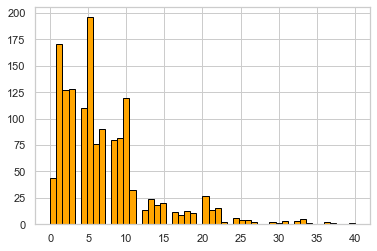

In [280]:
plt.hist(df_hr['YearsAtCompany'], color = 'orange', edgecolor = 'black', bins = 50)

# Видим, что распределение похоже на Лог-нормальное. Наибольшее число сотрдуников работает в нашей компании от 0 до 10 лет, наибольшее число сотрдуников имеют примерно 5 летний опыт работы в компании

# Давайте также посчитаем где лежит 90-й перцентиль. 



In [281]:
df_hr.YearsAtCompany.quantile(q=0.9)

15.0

Это означает, что 10% сотрудников в выборке имеют больше 15 лет опыта работы в этой компании

Давайте объявим аномалиями все что выше этой отметки и выведем тех у кого 15 и более лет опыта.

In [282]:
df_hr_ab = df_hr[df_hr['YearsAtCompany'] > 15]
df_hr_ab

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_sal
18,53,0,2,1219,Sales,2,4,Life Sciences,1,23,1,0,78,2,4,Manager,4,Married,15427,22021,2,Y,0,16,3,3,80,0,31,3,3,25,8,3,7,0
28,44,0,2,477,Research & Development,7,4,Medical,1,36,1,0,42,2,3,Healthcare Representative,4,Married,10248,2094,3,Y,0,14,3,4,80,1,24,4,3,22,6,5,17,0
45,41,1,2,1360,Research & Development,12,3,Technical Degree,1,58,2,0,49,3,5,Research Director,3,Married,19545,16280,1,Y,0,12,3,4,80,0,23,0,3,22,15,15,8,0
62,50,0,2,989,Research & Development,7,2,Medical,1,80,2,0,43,2,5,Research Director,3,Divorced,18740,16701,5,Y,1,12,3,4,80,1,29,2,2,27,3,13,8,0
63,59,0,2,1435,Sales,25,3,Life Sciences,1,81,1,0,99,3,3,Sales Executive,1,Single,7637,2354,7,Y,0,11,3,4,80,0,28,3,2,21,16,7,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,38,0,2,201,Research & Development,10,3,Medical,1,2015,2,0,99,1,3,Research Director,3,Married,13206,3376,3,Y,0,12,3,1,80,1,20,3,3,18,16,1,11,0
1432,37,0,2,161,Research & Development,10,3,Life Sciences,1,2017,3,0,42,4,3,Research Director,4,Married,13744,15471,1,Y,1,25,4,1,80,1,16,2,3,16,11,6,8,0
1443,42,0,2,300,Research & Development,2,3,Life Sciences,1,2031,1,1,56,3,5,Manager,3,Married,18880,17312,5,Y,0,11,3,1,80,0,24,2,2,22,6,4,14,0
1445,41,0,2,582,Research & Development,28,4,Life Sciences,1,2034,1,0,60,2,4,Manufacturing Director,2,Married,13570,5640,0,Y,0,23,4,3,80,1,21,3,3,20,7,0,10,0


Получили 36 человек. Опыт их работы может достигать 27 лет, возможно это основатели компании

# Выводы по набору данных

Что мы сейчас обнаружили: 

1. Набор содержит информацию о 1470 сотрудниках, часть из которых уже покинули компанию. Исторические данные смешаны с фактическими данными о сотрудниках
2. Зарплаты между гендерами распределены скорее всего равномерно, явных искажений не наблюдается. Тем не менее, среднее значение выше у женщин, что вероятнее всего обусловлено большим числом мужчин 
на низкооплачиваемых должностях. При этом наибольшую з/п в компании получают именно мужчины, возможно они занимают ключевые должности в компании. Это можно рассматривать как потенциальную возможность 
улучшения гендерного баланса на ключевых местах в компании. 
3. Опыт работы имеет распределение похоже на Лог-нормальное - наибольшее число сотрдуников работает в нашей компании от 0 до 10 лет, наибольшее число сотрдуников имеют примерно 5 летний опыт работы в компании
4. 10% сотрудников в выборке имеют больше 15 лет опыта работы в этой компании, их число составляет 36. 